In [108]:
# General
import pandas as pd
import numpy as np
import datetime
import os
import glob
import sqlite3
from math import ceil
# Data viz
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('../data/MACIMIDE_Global_Expatriate_Dual_Citizenship_Dataset_V5.00.csv')
wdi = pd.read_csv('../data/WDIData.csv',usecols = range(65))

In [7]:
cname = wdi.drop_duplicates(subset='Country Name')['Country Name']
wdi = wdi.loc[~wdi['Country Name'].isin(cname[:49])]

In [8]:
country_old = df.loc[df.world_region.isna()]['country'].unique()
df = df.loc[~df['country'].isin(country_old)]
def world_region(x):
    if x == 1:
        return 'Africa'
    elif x == 2:
        return 'Asia'
    elif x == 3:
        return 'Europe'
    elif x== 6:
        return 'Oceania'
    else:
        return 'America'    
    
df['world_region'] = df['world_region'].apply(lambda x:world_region(x) )
df = df.query('Year >= 2000 & Year <2020')


In [43]:
America = ["United States of America",'Canada','Mexico','Brazil', 'Colombia','Chile','Argentina']
Europe = ['Italy', 'Germany', 'Denmark', 'Poland', 'United Kingdom (of Great Britain and Northern Ireland)','France','Netherlands']
Extreme_Orient = ['China',  'Thailand', 'Australia', 'India',  'Azerbaijan','Japan']
Africa = ['South Africa', 'Djibouti', 'Morocco', 'Nigeria', 'Botswana']
Countries = [c for i in (America,Europe,Africa,Extreme_Orient) for c in i]

df_country = df.copy()
df_country = df.loc[df['country'].isin((Countries))]
len(df_country['country'].unique())

25

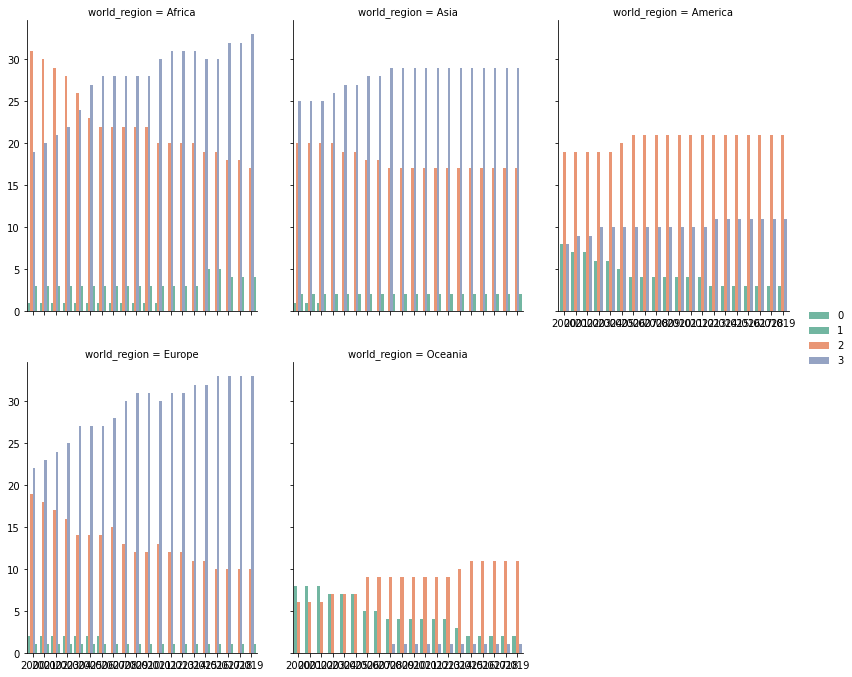

In [45]:
df_year = df.query('Year >=2012 & Year<=2018')

g = sns.FacetGrid(df,col='world_region',col_wrap = 3,legend_out=True)
g = (g.map_dataframe(sns.countplot,x='Year',hue='Dualcit_grouped', palette =sns.color_palette("Set2", 3) ).add_legend())
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
plt.show()



In [233]:
def boxplot(year,indicator_code,df):
    max_ = 2018 - year +1
    fig,axes= plt.subplots(ceil(np.sqrt(max_)),ceil(np.sqrt(max_)),figsize=(20,20))
    
    for y, ax in zip(list(range(year,2019)),axes.flatten()):   
        df_year = df.loc[df['Year']==y]
        wdi_year = wdi[['Country Code','Indicator Code','Indicator Name',str(y),'Country Name']].loc[wdi['Indicator Code'] == indicator_code]
        df_year = df_year.merge(wdi_year, right_on='Country Code',left_on = 'ISO3' )
        
        sns.boxplot(data=df_year,x='Dualcit_grouped',y=(df_year[str(y)]),ax = ax)
        ax.set_ylabel('')
        ax.set_xlabel(y)
        na_number = df_year[str(y)].isnull().sum()
        values = df_year.groupby('Dualcit_grouped').count()[str(y)]
        
        for i,value in enumerate(values):
            ax.text(i-0.15 ,  df_year[str(y)].max()+df_year[str(y)].max()*0.09   , str(value), color='black', fontweight='bold',fontsize=15)
            ax.text(-1 , df_year[str(y)].min()-np.sqrt(df_year[str(y)].min()*1.3 )     , '% of missing: '+str(round((na_number/len(df_year))*100,2)), color='black', fontweight='bold',fontsize=12)    

    fig.suptitle((df_year['Indicator Name'].unique()))
    
        
    return 

In [300]:
indic_full = wdi[['Country Code','Indicator Code','Indicator Name','2014','Country Name']].groupby('Indicator Name').count()['2014'].sort_values(ascending=False)
indic_full = indic_full[indic_full>180]
indic_full[141:145]

Indicator Name
PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)    194
PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)    194
Agriculture, forestry, and fishing, value added (current US$)                                      194
PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)    194
Name: 2014, dtype: int64

In [293]:

indicators = wdi[['Indicator Code','Indicator Name']].set_index('Indicator Code').drop_duplicates()
pd.options.display.max_colwidth = 200
indicators.loc[indicators['Indicator Name'].str.contains('Mortality rate, under-5')]
#good ones with no missing   EG.ELC.ACCS.ZS -SL.TLF.CACT.FM.NE.ZS  - EN.ATM.CO2E.LF.ZS - SP.DYN.CDRT.IN - 
                            #TM.VAL.MRCH.R3.ZS- TX.VAL.MRCH.R3.ZS
                            #SP.DYN.LE00.FE.IN- SH.TBS.DTEC.ZS- SP.ADO.TFRT - SH.DYN.2024 - SH.DYN.MORT.FE - 
                            #SE.COM.DURS - SH.DYN.MORT -SL.TLF.TOTL.FE.ZS  

    
    #indicators to look SG.VAW.REFU.ZS - SI.POV.GINI - SP.POP.TECH.RD.P6 - per_allsp.adq_pop_tot
                    #- per_allsp.ben_q1_tot - #too much missing in all      

,Indicator Name
Indicator Code,
SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)"
SH.DYN.MORT.FE,"Mortality rate, under-5, female (per 1,000 live births)"
SH.DYN.MORT.MA,"Mortality rate, under-5, male (per 1,000 live births)"


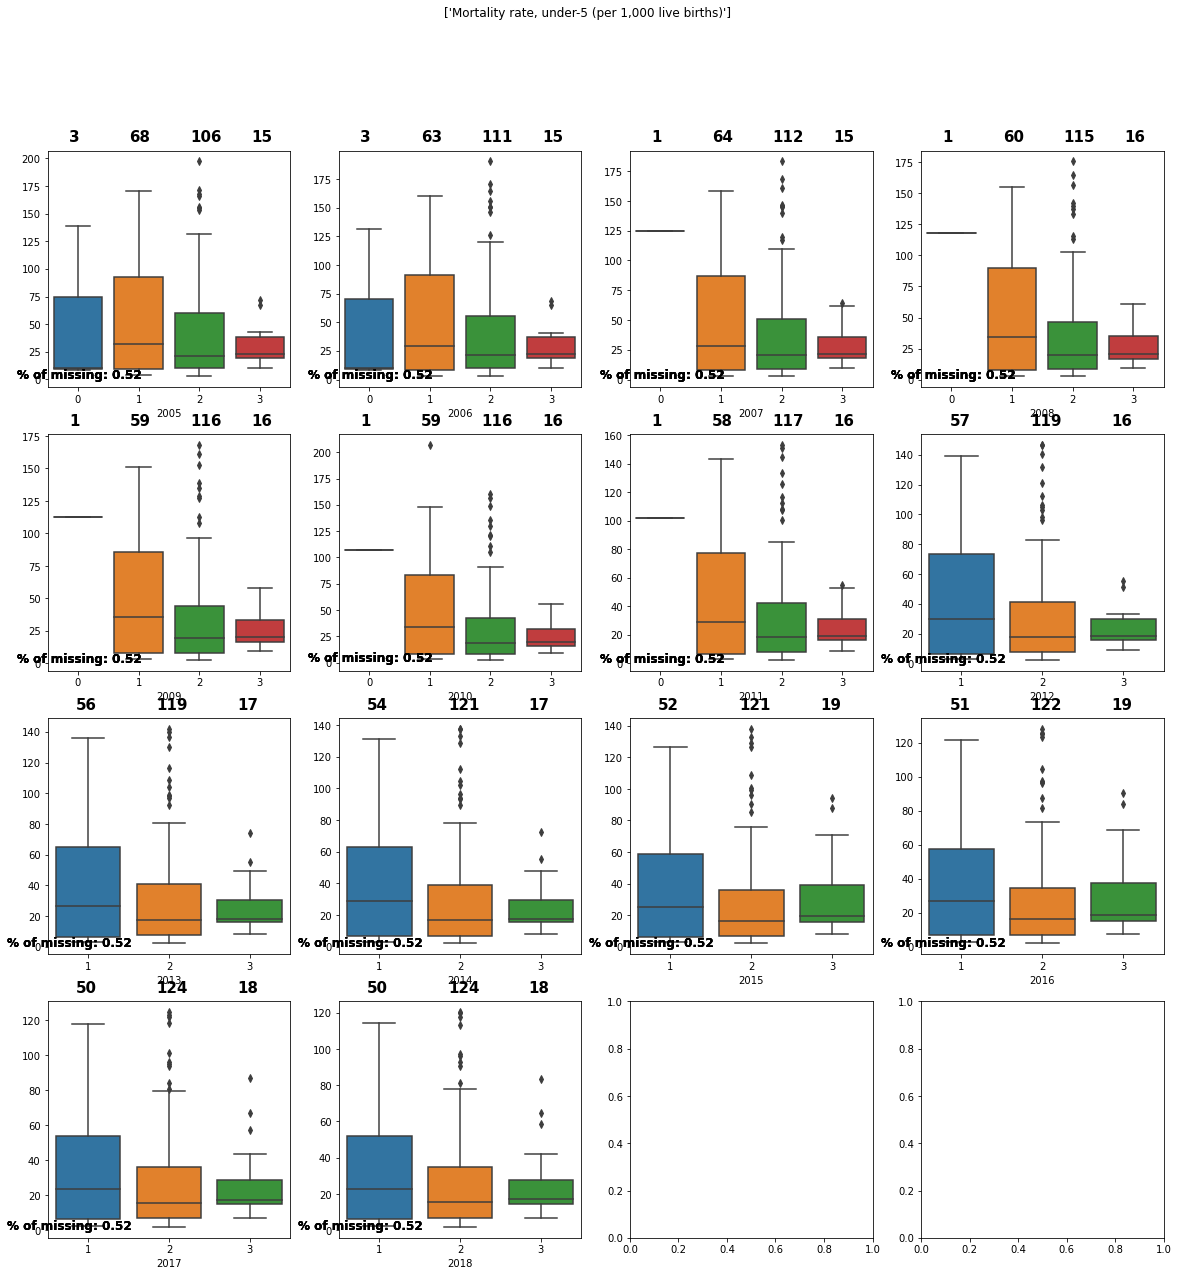

In [299]:
boxplot(2005,'SH.DYN.MORT',df)